In [36]:
from collections import deque

# 節點類別，包含該節點的鄰居節點和訪問標記
class Node:
    def __init__(self, val):
        self.val = val
        self.neighbors = []
        self.visited = False

# 圖類別，包含節點列表和添加節點的方法
class Graph:
    def __init__(self):
        self.nodes = []
        
    def add_node(self, val):
        node = Node(val)
        self.nodes.append(node)
        return node

    # 添加有向邊，由 node1 指向 node2
    def add_edge(self, node1, node2):
        node1.neighbors.append(node2)
        node2.neighbors.append(node1)
        
    def get_nodes(self):
        return self.nodes

    # 深度優先搜尋
    def dfs(self, start):
        # 使用堆疊實現深度優先搜尋
        stack = [start]
        while stack:
            node = stack.pop()
            if not node.visited:
                node.visited = True
                print(node.val, end=' ')
                for neighbor in node.neighbors:
                    stack.append(neighbor)

    # 廣度優先搜尋
    def bfs(self, start):
        # 使用隊列實現廣度優先搜尋
        queue = deque([start])
        while queue:
            node = queue.popleft()
            if not node.visited:
                node.visited = True
                print(node.val, end=' ')
                for neighbor in node.neighbors:
                    queue.append(neighbor)

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def draw_graph(graph):
    # 建立無向圖
    G = nx.Graph()
    for node in graph.get_nodes():
        G.add_node(node.val)
        for neighbor in node.neighbors:
            G.add_edge(node.val, neighbor.val)
    
    # 使用 Kamada-Kawai 布局
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G, pos, node_color='blue', node_size=500, font_size=16, with_labels=True)

    plt.show()

In [44]:
# 建立圖
graph = Graph()
node1 = graph.add_node(1)
node2 = graph.add_node(2)
node3 = graph.add_node(3)
node4 = graph.add_node(4)
node5 = graph.add_node(5)
graph.add_edge(node1, node2)
graph.add_edge(node1, node4)
graph.add_edge(node2, node3)
graph.add_edge(node2, node4)
graph.add_edge(node3, node5)
graph.add_edge(node4, node3)
graph.add_edge(node4, node5)

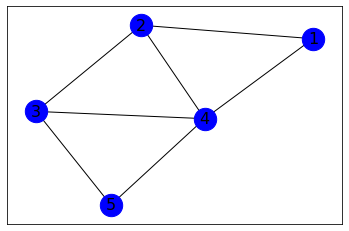

In [50]:
draw_graph(graph)

In [48]:
# 深度優先搜尋
graph.dfs(node1)  # 輸出: 1 4 5 3 2

In [49]:
# 廣度優先搜尋
graph.bfs(node1)  # 輸出: 1 2 4 3 5